In [29]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, io, denoise
from cellpose.io import imread
import os
from glob import glob
from PIL import Image


In [30]:
io.logger_setup()

creating new log file
2025-01-02 12:01:28,122 [INFO] WRITING LOG OUTPUT TO C:\Users\14495\.cellpose\run.log
2025-01-02 12:01:28,124 [INFO] 
cellpose version: 	3.1.0 
platform:       	win32 
python version: 	3.10.15 
torch version:  	2.5.1+cpu


(<Logger cellpose.io (INFO)>, WindowsPath('C:/Users/14495/.cellpose/run.log'))

In [11]:
# model_type='cyto' or 'nuclei' or 'cyto2' or 'cyto3'
# if deblurring is not required
model = models.Cellpose(model_type='cyto3')

2025-01-01 23:59:30,013 [INFO] >>>> using CPU
2025-01-01 23:59:30,014 [INFO] >>>> using CPU
2025-01-01 23:59:30,016 [INFO] >> cyto3 << model set to be used
2025-01-01 23:59:30,154 [INFO] >>>> loading model C:\Users\14495\.cellpose\models\cyto3
2025-01-01 23:59:30,348 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


In [31]:
# if deblurring is required
model = denoise.CellposeDenoiseModel(model_type = 'cyto3', restore_type = 'deblur_cyto3')

2025-01-02 12:01:31,252 [INFO] >> deblur_cyto3 << model set to be used
2025-01-02 12:01:31,270 [INFO] >>>> using CPU
2025-01-02 12:01:31,271 [INFO] >>>> using CPU
2025-01-02 12:01:31,708 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2025-01-02 12:01:31,712 [INFO] >> cyto3 << model set to be used
2025-01-02 12:01:31,712 [INFO] >>>> using CPU
2025-01-02 12:01:31,712 [INFO] >>>> using CPU


D:\Anaconda\envs\cellpose\lib\site-packages\cellpose\resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, map_location=torch.

2025-01-02 12:01:31,780 [INFO] >>>> loading model C:\Users\14495\.cellpose\models\cyto3
2025-01-02 12:01:31,932 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)


In [59]:
def get_filename(filename, suffix_to_remove=None):
    filename_with_ex = os.path.basename(filename).replace(':', '_').replace('\\', '_').replace('/', '_').replace('?', '_').replace('*', '_').replace('[', '_').replace(']', '_')
    filename_clear = os.path.splitext(filename_with_ex)[0]
    if suffix_to_remove and filename_clear.endswith(suffix_to_remove):
        filename_clear = filename_clear[: -len(suffix_to_remove)]
    return filename_clear

In [60]:
# Process 1 channel grayscale image
multichannel = False
# Load your files 
# Enter your filepath
filepath = 'C:/Users/14495/OneDrive - KTH/Huh-7_cells/Placa1_191735'
file_list = glob(filepath+"/*GFP_001.tif")
imgs = [imread(f) for f in file_list]
filenames = [get_filename(f, suffix_to_remove='_GFP_001') for f in file_list]
nimg = len(imgs)

# Load diameter
diameter = 141

In [69]:
# Process DAPI and GFP images simultaneously
multichannel = True
from glob import glob
files_DAPI = glob('D:/AAA click here to explore the world/KTH KI SU/project in life science/data/Placa1_145700_HEPG2/*DAPI_001.tif')
files_GFP = glob('D:/AAA click here to explore the world/KTH KI SU/project in life science/data/Placa1_145700_HEPG2/*GFP_001.tif')

filenames_DAPI = [get_filename(f, suffix_to_remove = '_DAPI_001') for f in files_DAPI]
filenames_GFP = [get_filename(f, suffix_to_remove = '_GFP_001') for f in files_GFP]

imgs_DAPI = [imread(f) for f in files_DAPI]
imgs_GFP = [imread(f) for f in files_GFP]

# Load diameter
diameter = 72.0

In [34]:
def combine_chs(imgs_ch1, imgs_ch2):
    if len(imgs_ch1) != len(imgs_ch2):
        raise ValueError("Data missing")
        
    imgs = []

    for image1, image2 in zip(imgs_ch1, imgs_ch2):
    
        # check if the image size matches with each other
        if image1.shape != image2.shape:
            raise ValueError("The two images must have the same dimensions.")
        height, width = image1.shape
        # create a new array for rgb images (uint=16)
        rgb_image = np.zeros((height, width, 3), dtype=np.uint16)

        # set channels
        rgb_image[:, :, 0] = 0  
        rgb_image[:, :, 1] = image1  
        rgb_image[:, :, 2] = image2 
        imgs.append(rgb_image)
        
    return imgs


In [70]:
# Combine two channels
imgs = combine_chs(imgs_GFP, imgs_DAPI)

In [71]:
from skimage.io import imsave
def save_tiff(images, filenames, suffix, savedir):
    if len(images) != len(filenames):
        raise ValueError("The list of images and the list of filenames are not the same length!")
    os.makedirs(os.path.dirname(savedir), exist_ok=True)
    for img,  filename in zip(images, filenames):
        saved_filepath  = os.path.join(savedir, filename + suffix + ".tiff")
        imsave(saved_filepath, img)
    print("All images are saved successfully!")

In [74]:
# Save the newly formed RGB images
save_tiff(imgs, filenames_DAPI, "_rgb", savedir = "D:/AAA click here to explore the world/KTH KI SU/project in life science/results/HepG2_cells results/rgb_images")

D:\Anaconda\envs\cellpose\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: D:/AAA click here to explore the world/KTH KI SU/project in life science/results/HepG2_cells results/rgb_images\D9_01_3_3_rgb.tiff is a low contrast image
  return func(*args, **kwargs)


All images are saved successfully!


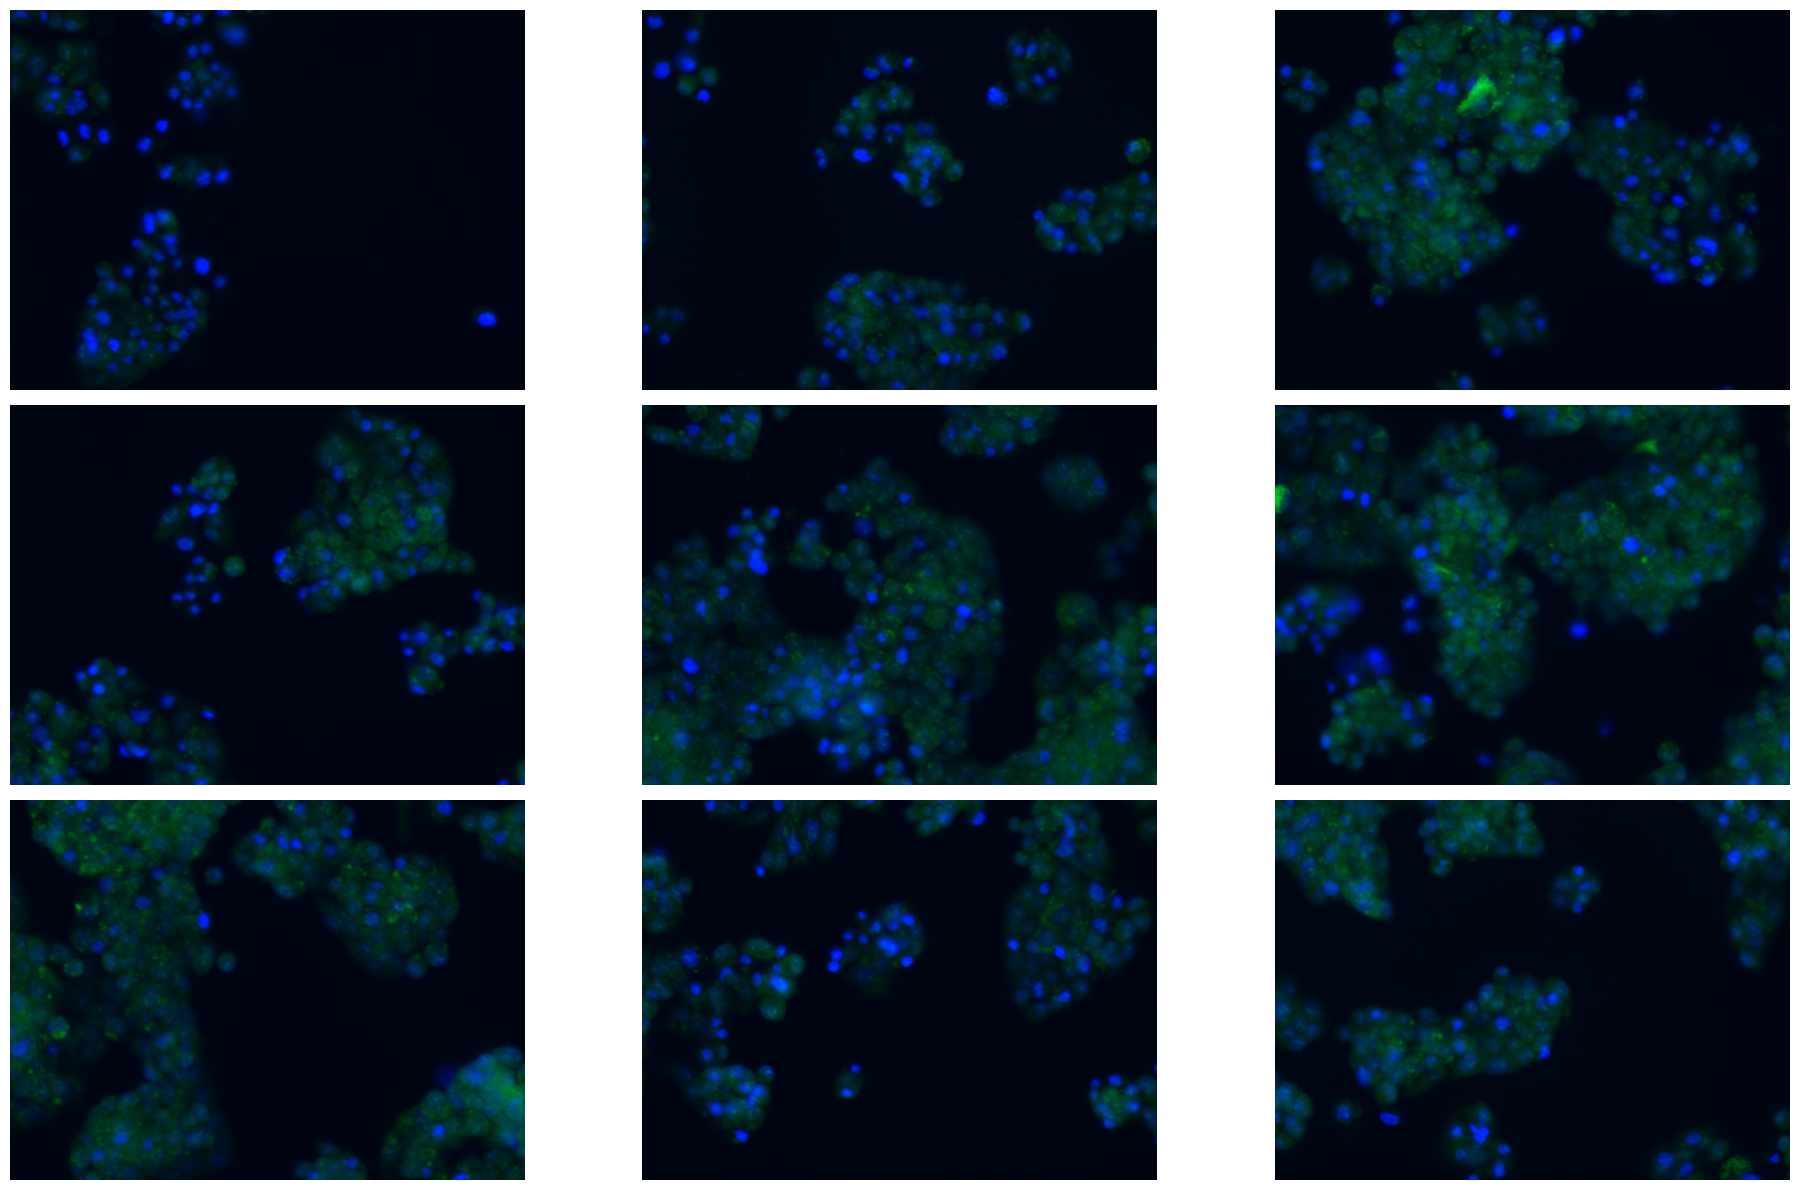

In [49]:
#Normalization so that the images can be visualized by plt
if multichannel == True:
    normalized_images = [img / 65535.0 for img in imgs]
else:
    normalized_images = imgs

plt.figure(figsize=(20, 12))
for i, img in enumerate(normalized_images[80:89]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)  
    plt.axis('off')
plt.tight_layout()
plt.show()


# define CHANNELS to run segementation on
grayscale=0, R=1, G=2, B=3

channels = [cytoplasm, nucleus]

if NUCLEUS channel does not exist, set the second channel to 0

channels = [0,0]

IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements

channels = [0,0] # IF YOU HAVE GRAYSCALE

channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus

channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

OR if you have different types of channels in each image

channels = [[2,3], [0,0], [0,0]]


In [75]:
# define CHANNELS to run segementation on
if multichannel == True:
    channels = [[2,3]]
if multichannel == False:
    channels = [[0,0]]

In [76]:
print(channels)

[[2, 3]]


In [79]:
# Run the segmentation model
masks, flows, styles, diams = model.eval(imgs, diameter=diameter, channels=channels, flow_threshold = 0.5)

2025-01-02 17:52:07,809 [INFO] 100%|##########| 270/270 [1:07:31<00:00, 15.01s/it]


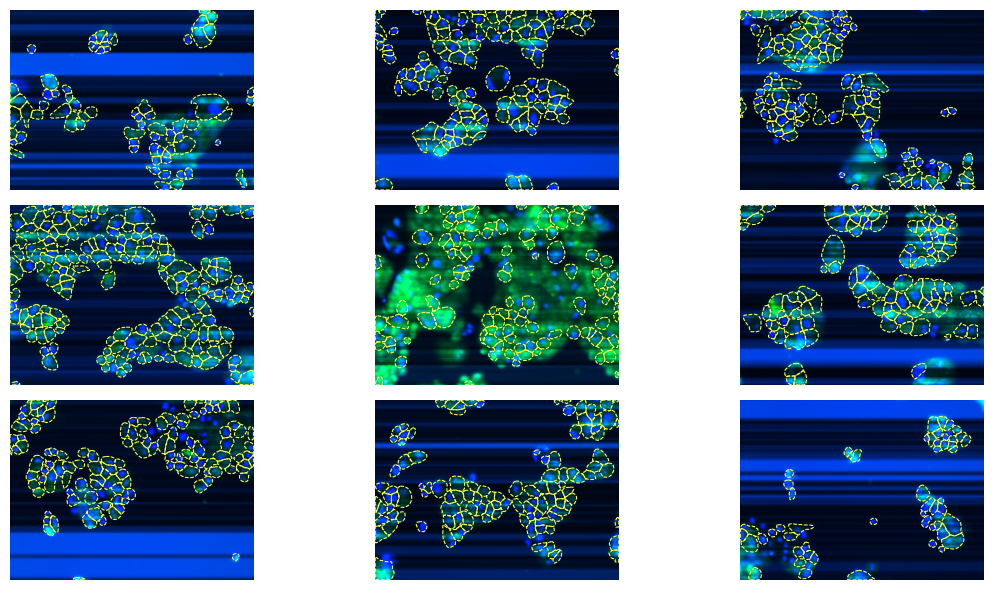

In [80]:
# Plot the results
from cellpose import transforms, plot, utils

plt.figure(figsize=(12,6))
for i in range(0,9):
    img = imgs[i].squeeze().copy()
    if multichannel == True:
        img = np.clip(transforms.normalize_img(img, axis=0), 0, 1) # need 3 dimensions
    ax = plt.subplot(3,3, 1+i)
    # if this image only has one channel (greyscale)
    if img[1].sum() == 0:
        img = img[0]
        ax.imshow(img, cmap = 'gray')
    # if the image has 2 channels, add one channel to expand it as RGB
    else:
        ax.imshow(img)
    plt.axis('off')
    # draw masks
    outlines_pred = utils.outlines_list(masks[i])
    for o in outlines_pred:
        plt.plot(o[:,0], o[:,1], color=[1,1,0.3], lw=0.75, ls="--")
        plt.axis('off')
plt.tight_layout()
plt.show()
    

In [81]:
def labeled_to_binary(masks):
    binary_masks = []
    for mask in masks:
        binary_mask = mask.copy()
        binary_mask[binary_mask > 0] = 255
        binary_masks.append(binary_mask)
    return binary_masks

In [82]:
# Transform the labeled masks into binary masks
binary_masks = labeled_to_binary(masks)

In [83]:
# check if the masks have been transformed
unique_values = np.unique(binary_masks[0])
print("Unique pixel values:", unique_values)

Unique pixel values: [  0 255]


*3. Save predicted masks*

In [85]:
# Save the results (labeled masks)
savedir = 'D:/AAA click here to explore the world/KTH KI SU/project in life science/results/HepG2_cells results/labeled'
io.save_masks(imgs, masks, flows, filenames_DAPI, png=False, tif=True, save_flows=False, save_outlines=True, savedir = savedir, save_mpl = True)

In [86]:
# Save the binary masks
savedir = 'D:/AAA click here to explore the world/KTH KI SU/project in life science/results/HepG2_cells results/binary'
io.save_masks(imgs, binary_masks, flows, filenames_DAPI, png=False, tif=True, suffix = '_binary', save_flows=False, save_outlines=False, savedir = savedir)